Env name: **cart pole**

Category: **Classic Control**

ALgorothim: **SARSA**

In [1]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

In [16]:
# 1. Initialize the CartPole environment

env = gym.make('CartPole-v1', render_mode='rgb_array')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

In [3]:
# 2. Define the number of discrete bins for each state dimension

num_bins = 40  # Increased number of bins for finer resolution
state_bins = [
    np.linspace(-4.8, 4.8, num_bins),    # Cart position
    np.linspace(-4, 4, num_bins),        # Cart velocity
    np.linspace(-0.418, 0.418, num_bins), # Pole angle
    np.linspace(-4, 4, num_bins)         # Pole angular velocity
]

In [4]:
# 3. Set hyperparameters for the SARSA algorithm

learning_rate = 0.5    # Initial learning rate
discount_factor = 0.99  # Discount factor for future rewards
epsilon = 1.0          # Initial exploration rate
epsilon_min = 0.01     # Minimum exploration rate
epsilon_decay = 0.999   # Decay rate for epsilon
episodes = 1000        # Number of training episodes
max_steps = 200        # Maximum steps per episode
rewards = []           # List to store total rewards for each episode
avg_rewards = []       # List to store average rewards for smoother visualization

In [5]:
# 4. Initialize the Q-table

q_table = np.zeros([num_bins] * state_size + [action_size])

In [6]:
# 5. Function to discretize the continuous state into a discrete state index

def discretize_state(state):
    state_index = []
    for i in range(len(state)):
        state_index.append(np.digitize(state[i], state_bins[i]) - 1)
    return tuple(state_index)

In [7]:
# 6. Function to choose an action using the epsilon-greedy policy

def choose_action(discrete_state, epsilon):
    if np.random.rand() <= epsilon:
        return env.action_space.sample()  # Random action (exploration)
    return np.argmax(q_table[discrete_state])  # Best action (exploitation)

In [9]:
# 7. Function to plot rewards and average rewards

def plot_rewards(rewards, avg_rewards):
    plt.figure(figsize=(12, 6))
    
    # Plot total rewards
    plt.subplot(2, 1, 1)
    plt.plot(rewards, label='Total Rewards', color='blue')
    plt.title('Total Rewards over Episodes')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.legend()

    # Plot average rewards
    plt.subplot(2, 1, 2)
    plt.plot(avg_rewards, label='Average Rewards', color='orange')
    plt.title('Average Rewards over Episodes')
    plt.xlabel('Episode')
    plt.ylabel('Average Reward')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [10]:
# 8. Function to test the trained agent

def test_agent(env, episodes=5):
    for episode in range(episodes):
        state, _ = env.reset()
        discrete_state = discretize_state(state)
        total_reward = 0
        done = False

        for step in range(max_steps):
            action = np.argmax(q_table[discrete_state])  # Choose the best action
            next_state, reward, done, truncated, _ = env.step(action)
            discrete_state = discretize_state(next_state)
            total_reward += reward
            
            env.render()  # Render the environment

            if done or truncated:
                break
        
        print(f"Test Episode {episode + 1}, Total Reward: {total_reward}")

    env.close()

In [11]:
# 9. SARSA algorithm

for episode in range(episodes):
    state, _ = env.reset()
    discrete_state = discretize_state(state)
    
    # Choose an initial action using epsilon-greedy policy
    action = choose_action(discrete_state, epsilon)
    total_reward = 0

    for step in range(max_steps):
        next_state, reward, done, truncated, _ = env.step(action)
        discrete_next_state = discretize_state(next_state)

        # Choose the next action using epsilon-greedy policy
        next_action = choose_action(discrete_next_state, epsilon)

        # Update Q-value using SARSA update rule
        q_table[discrete_state + (action,)] += learning_rate * (
            reward + discount_factor * q_table[discrete_next_state + (next_action,)] - q_table[discrete_state + (action,)]
        )

        discrete_state = discrete_next_state
        action = next_action  # Move to the next action
        total_reward += reward

        if done or truncated:
            break

    rewards.append(total_reward)

    # Calculate and store average rewards
    avg_reward = np.mean(rewards[-10:])  # Average over the last 10 episodes
    avg_rewards.append(avg_reward)

    # Decay epsilon to gradually reduce exploration
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

    print(f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward}, Average Reward: {avg_reward:.2f}, Epsilon: {epsilon:.4f}")

Episode 1/1000, Total Reward: 25.0, Average Reward: 25.00, Epsilon: 0.9990
Episode 2/1000, Total Reward: 10.0, Average Reward: 17.50, Epsilon: 0.9980
Episode 3/1000, Total Reward: 22.0, Average Reward: 19.00, Epsilon: 0.9970
Episode 4/1000, Total Reward: 28.0, Average Reward: 21.25, Epsilon: 0.9960
Episode 5/1000, Total Reward: 28.0, Average Reward: 22.60, Epsilon: 0.9950
Episode 6/1000, Total Reward: 14.0, Average Reward: 21.17, Epsilon: 0.9940
Episode 7/1000, Total Reward: 14.0, Average Reward: 20.14, Epsilon: 0.9930
Episode 8/1000, Total Reward: 44.0, Average Reward: 23.12, Epsilon: 0.9920
Episode 9/1000, Total Reward: 22.0, Average Reward: 23.00, Epsilon: 0.9910
Episode 10/1000, Total Reward: 15.0, Average Reward: 22.20, Epsilon: 0.9900
Episode 11/1000, Total Reward: 24.0, Average Reward: 22.10, Epsilon: 0.9891
Episode 12/1000, Total Reward: 11.0, Average Reward: 22.20, Epsilon: 0.9881
Episode 13/1000, Total Reward: 9.0, Average Reward: 20.90, Epsilon: 0.9871
Episode 14/1000, Total

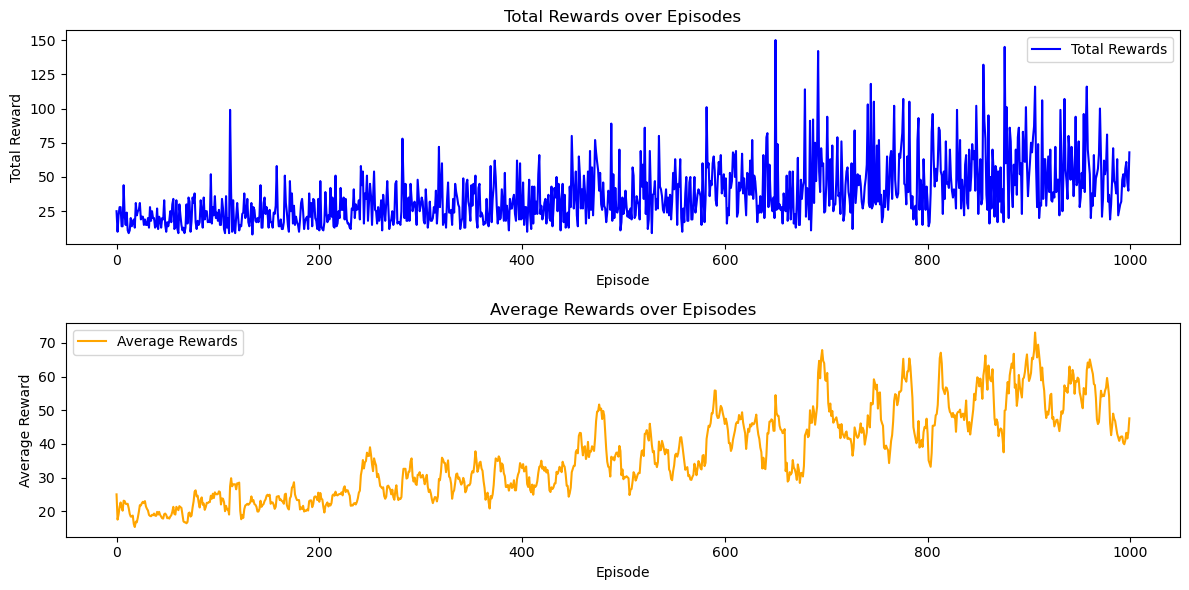

In [12]:
 # 10. Plot the training rewards

plot_rewards(rewards, avg_rewards)

In [18]:
# 11. Test the trained agent

print("Testing the trained agent:")
test_agent(env, episodes=15)

Testing the trained agent:
Test Episode 1, Total Reward: 110.0
Test Episode 2, Total Reward: 59.0
Test Episode 3, Total Reward: 74.0
Test Episode 4, Total Reward: 111.0
Test Episode 5, Total Reward: 80.0
Test Episode 6, Total Reward: 106.0
Test Episode 7, Total Reward: 80.0
Test Episode 8, Total Reward: 92.0
Test Episode 9, Total Reward: 105.0
Test Episode 10, Total Reward: 104.0
Test Episode 11, Total Reward: 57.0
Test Episode 12, Total Reward: 41.0
Test Episode 13, Total Reward: 39.0
Test Episode 14, Total Reward: 77.0
Test Episode 15, Total Reward: 71.0
